In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn import tree, metrics
from sklearn.model_selection import train_test_split, ShuffleSplit
from utils import plot_learning_curve, my_load_wine, print_tree, get_estimator_final_score
import graphviz 

# Decision Trees
## Breast Cancer Wisconsin (Diagnostic) Data Set

In [2]:
breast_cancer = load_breast_cancer()
X, y = breast_cancer.data, breast_cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

### Playing with pruning
We are going to test how the tree does the splits, diffrent prunning values and max length of the tree. 
I was playing with the diffrent parameters by hand

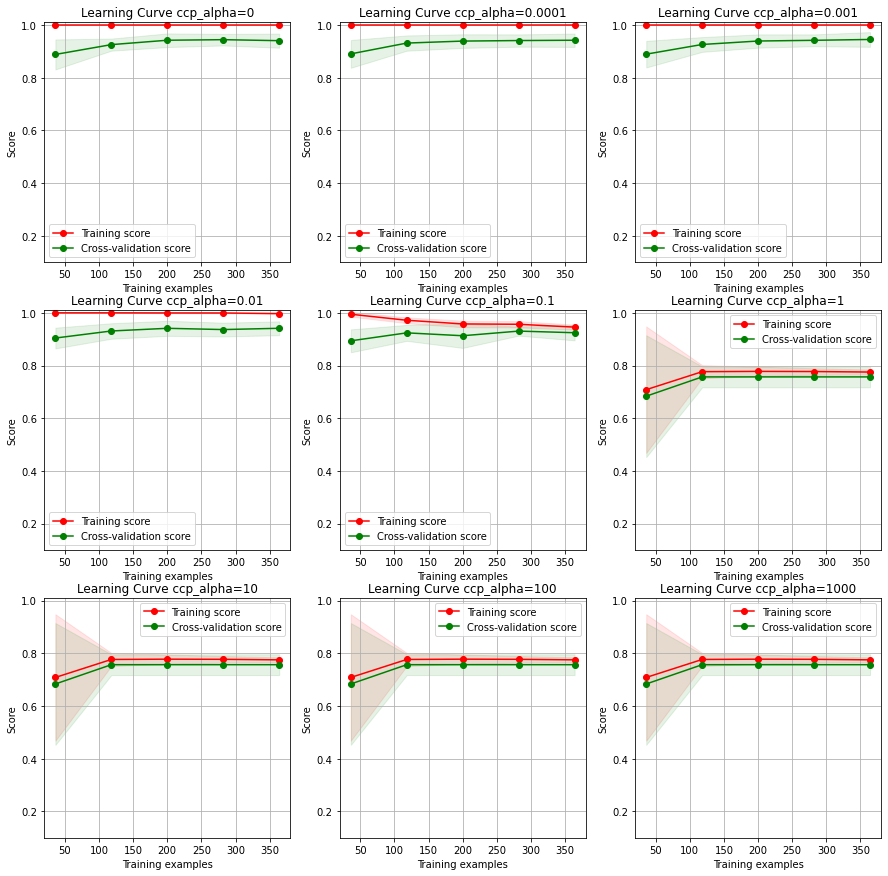

In [3]:
# Looking for the range of interesting ccp_alphas
grid_size = 3
_, axes = plt.subplots(grid_size, grid_size, figsize=(15, 15))
ccp_alpha_values = [0, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
ylim = (0.1, 1.01)
cv = ShuffleSplit(n_splits=20, test_size=0.2, random_state=0)
for i, ccp_alpha_value in enumerate(ccp_alpha_values):
    axe_to_plot = axes[int(i/len(axes)), (i%len(axes[0]))]
    title = f"Learning Curve ccp_alpha={ccp_alpha_value}"
    estimator = tree.DecisionTreeClassifier(criterion="entropy", ccp_alpha=ccp_alpha_value)
    plot_learning_curve(estimator, title, X_train, y_train, axes=axe_to_plot, ylim=ylim, cv=cv, n_jobs=4, scoring="f1")

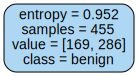

In [4]:
print_tree(tree.DecisionTreeClassifier(criterion="entropy", ccp_alpha=1), breast_cancer, X_train, y_train)

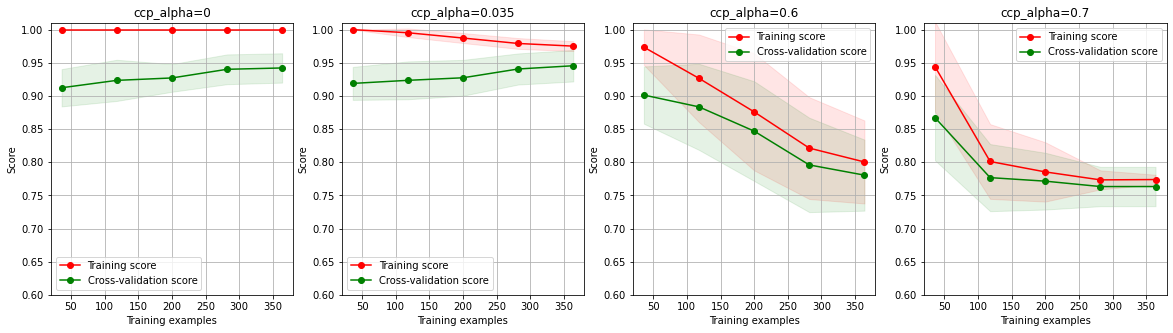

In [5]:
# Curious case with prunning
_, axes = plt.subplots(1, 4, figsize=(20, 5))
ccp_alpha_values = [0, .2, .21, .22, .23, .24, .25, .26, .27]
ccp_alpha_values = [0, .035, .6, .7]
#ccp_alpha_values = [0, .01, .02, .03, .04, .05, .06, .07, .08]
#ccp_alpha_values = [0, .02, .021, .022, .023, .024, .025, .026, .027]
ylim = (0.6, 1.01)
cv = ShuffleSplit(n_splits=20, test_size=0.2, random_state=1)
for i, ccp_alpha_value in enumerate(ccp_alpha_values):
    axe_to_plot = axes[i]
    title = f"ccp_alpha={ccp_alpha_value}"
    estimator = tree.DecisionTreeClassifier(criterion="entropy", ccp_alpha=ccp_alpha_value)
    plot_learning_curve(estimator, title, X_train, y_train, axes=axe_to_plot, ylim=ylim, cv=cv, n_jobs=4, scoring="f1")

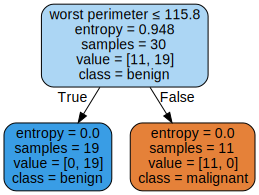

In [6]:
print_tree(tree.DecisionTreeClassifier(criterion="entropy", ccp_alpha=0.7), breast_cancer, X_train[:30,:], y_train[:30])

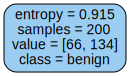

In [7]:
print_tree(tree.DecisionTreeClassifier(criterion="entropy", ccp_alpha=0.7), breast_cancer, X_train[:200,:], y_train[:200])

### Playing with the tree's depth

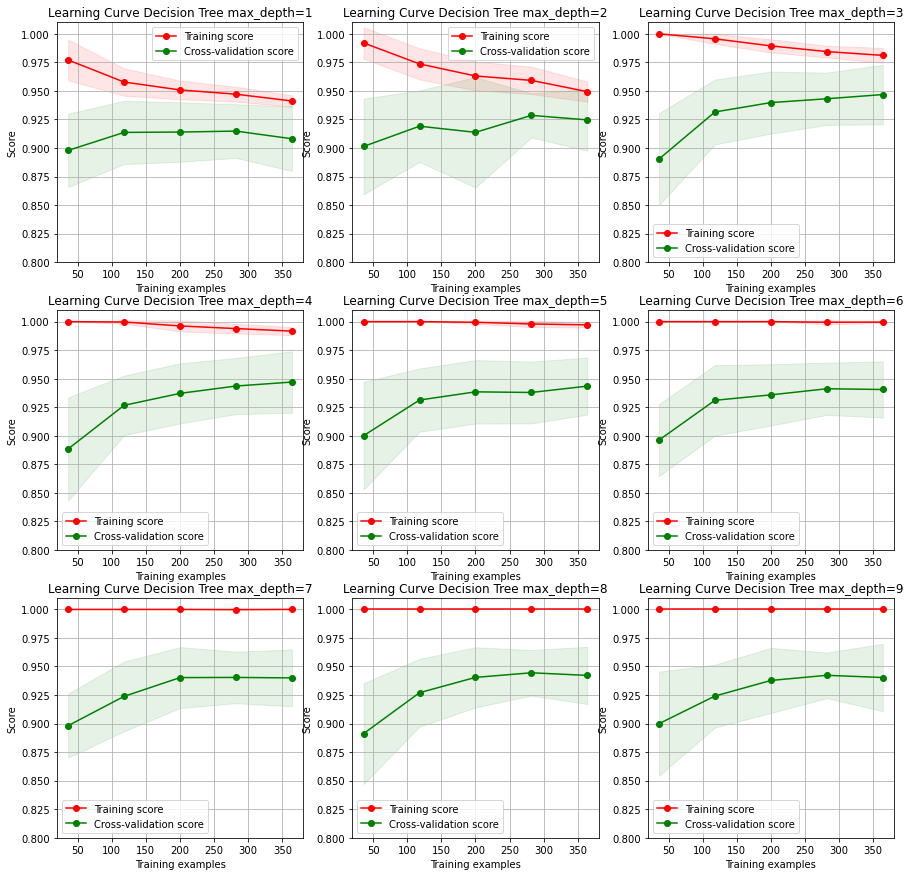

In [8]:
grid_size = 3
_, axes = plt.subplots(grid_size, grid_size, figsize=(15, 15))
depth_values = [1, 2, 3, 4, 5, 6, 7, 8, 9]
ylim = (0.8, 1.01)
cv = ShuffleSplit(n_splits=20, test_size=0.2, random_state=0)
for i, depth_value in enumerate(depth_values):
    axe_to_plot = axes[int(i/len(axes)), (i%len(axes[0]))]
    title = f"Learning Curve Decision Tree max_depth={depth_value}"
    estimator = tree.DecisionTreeClassifier(criterion="entropy", max_depth=depth_value)
    plot_learning_curve(estimator, title, X_train, y_train, axes=axe_to_plot, ylim=ylim, cv=cv, n_jobs=4, scoring="f1")

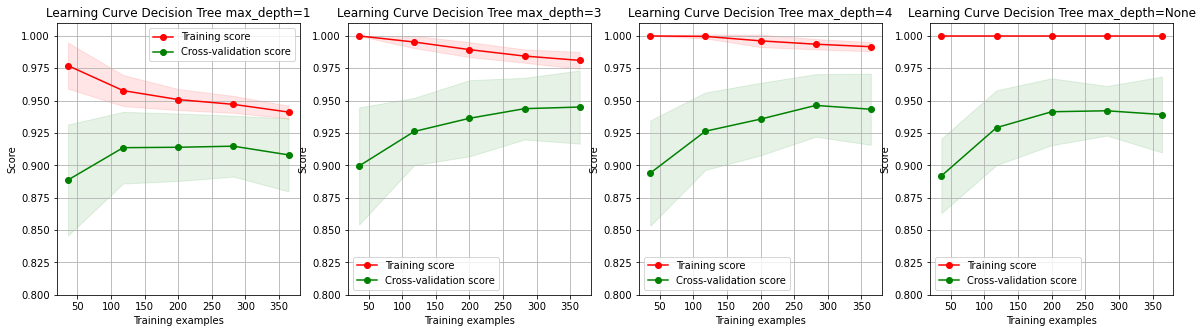

In [9]:
_, axes = plt.subplots(1, 4, figsize=(20, 5))
depth_values = [1, 3, 4, None]
ylim = (0.8, 1.01)
cv = ShuffleSplit(n_splits=20, test_size=0.2, random_state=0)
for i, depth_value in enumerate(depth_values):
    axe_to_plot = axes[i]
    title = f"Learning Curve Decision Tree max_depth={depth_value}"
    estimator = tree.DecisionTreeClassifier(criterion="entropy", max_depth=depth_value)
    plot_learning_curve(estimator, title, X_train, y_train, axes=axe_to_plot, ylim=ylim, cv=cv, n_jobs=4, scoring="f1")

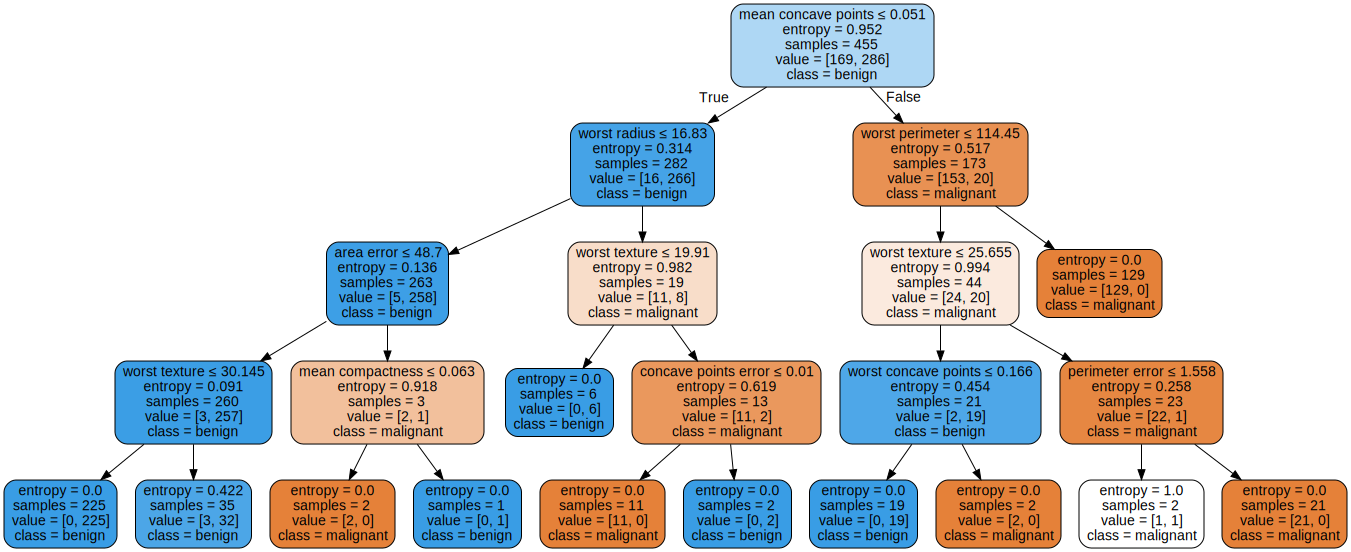

In [10]:
print_tree(tree.DecisionTreeClassifier(criterion="entropy", max_depth=4), breast_cancer, X_train, y_train)

<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

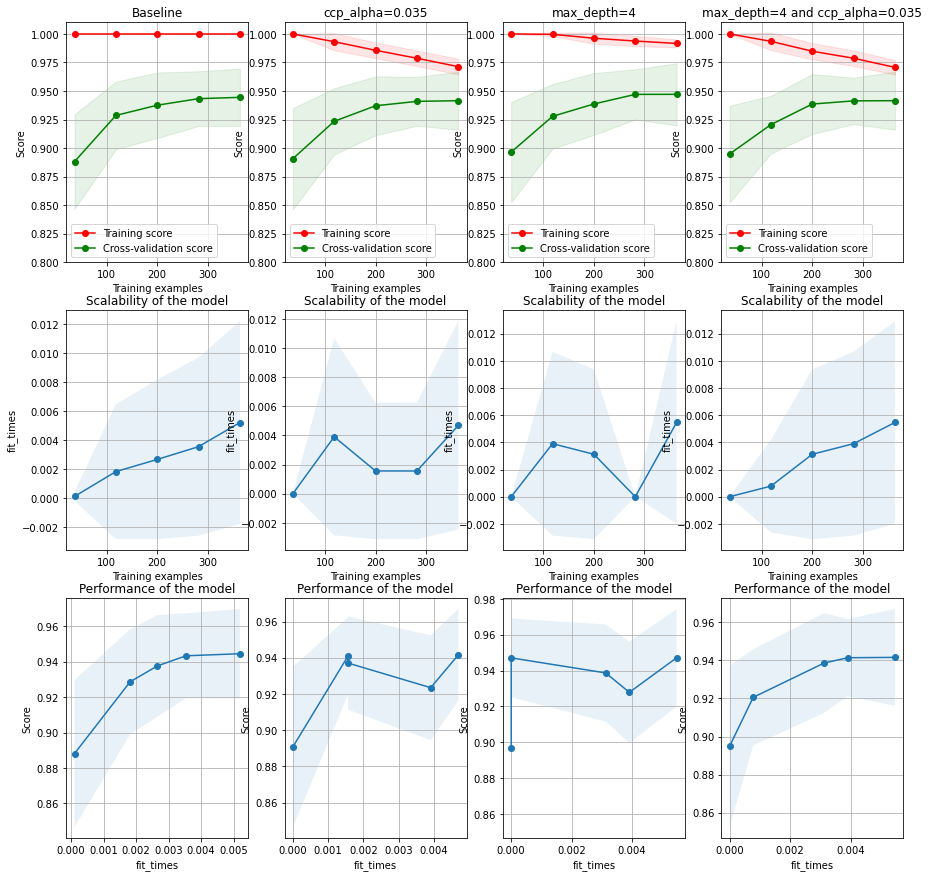

In [11]:
# Comparing the models
_, axes = plt.subplots(3, 4, figsize=(15, 15))
ylim = (0.8, 1.01)
cv = ShuffleSplit(n_splits=20, test_size=0.2, random_state=0)
# Baseline
title = f"Baseline"
estimator = tree.DecisionTreeClassifier(criterion="entropy")
plot_learning_curve(estimator, title, X_train, y_train, axes=axes[:, 0], ylim=ylim, cv=cv, n_jobs=4, scoring="f1", detailed=True)
# Best Prunning parameter
title = f"ccp_alpha=0.035"
estimator = tree.DecisionTreeClassifier(criterion="entropy", ccp_alpha=.035)
plot_learning_curve(estimator, title, X_train, y_train, axes=axes[:, 1], ylim=ylim, cv=cv, n_jobs=4, scoring="f1", detailed=True)
# Best depth parameter
title = f"max_depth=4"
estimator = tree.DecisionTreeClassifier(criterion="entropy", max_depth=4)
plot_learning_curve(estimator, title, X_train, y_train, axes=axes[:, 2], ylim=ylim, cv=cv, n_jobs=4, scoring="f1", detailed=True)
# Combining the two
title = f"max_depth=4 and ccp_alpha=0.035"
estimator = tree.DecisionTreeClassifier(criterion="entropy", max_depth=4, ccp_alpha=0.035)
plot_learning_curve(estimator, title, X_train, y_train, axes=axes[:, 3], ylim=ylim, cv=cv, n_jobs=4, scoring="f1", detailed=True)

In [14]:
# Final evaluation
estimator = tree.DecisionTreeClassifier(criterion="entropy")
get_estimator_final_score(estimator, X_train, y_train, X_test, y_test, "Baseline", "f1")
estimator = tree.DecisionTreeClassifier(criterion="entropy", ccp_alpha=0.035)
get_estimator_final_score(estimator, X_train, y_train, X_test, y_test, "ccp_alpha=0.035", "f1")
estimator = tree.DecisionTreeClassifier(criterion="entropy", max_depth=4)
get_estimator_final_score(estimator, X_train, y_train, X_test, y_test, "max_depth=4", "f1")
estimator = tree.DecisionTreeClassifier(criterion="entropy", max_depth=4, ccp_alpha=0.035)
get_estimator_final_score(estimator, X_train, y_train, X_test, y_test, "max_depth=4 and ccp_alpha=0.035", "f1")

Test f1 score for Baseline: 0.9517241379310345
Test f1 score for ccp_alpha=0.035: 0.9726027397260273
Test f1 score for max_depth=4: 0.9655172413793103
Test f1 score for max_depth=4 and ccp_alpha=0.035: 0.9726027397260273


0.9726027397260273

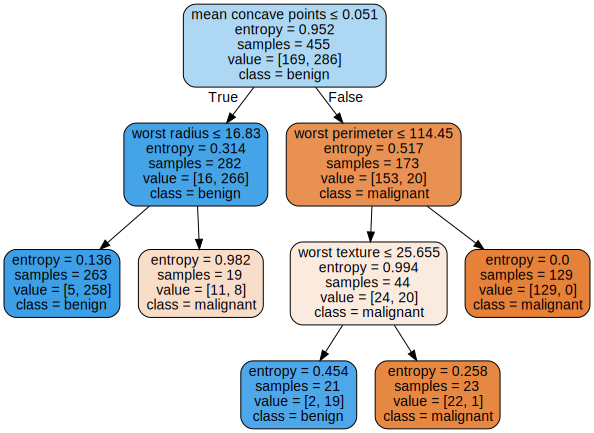

In [15]:
print_tree(tree.DecisionTreeClassifier(criterion="entropy", ccp_alpha=0.035), breast_cancer, X_train, y_train)

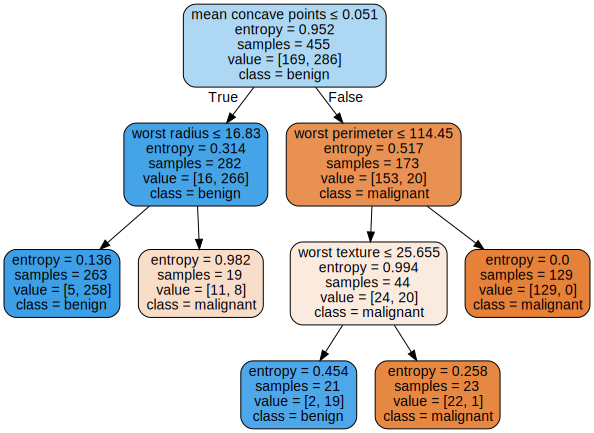

In [16]:
print_tree(tree.DecisionTreeClassifier(criterion="entropy", max_depth=4, ccp_alpha=0.035), breast_cancer, X_train, y_train)

## Wine Quality Data Set

In [18]:
wine = my_load_wine("../Datasets/wine/")
X, y = wine.data, wine.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

### Playing with pruning

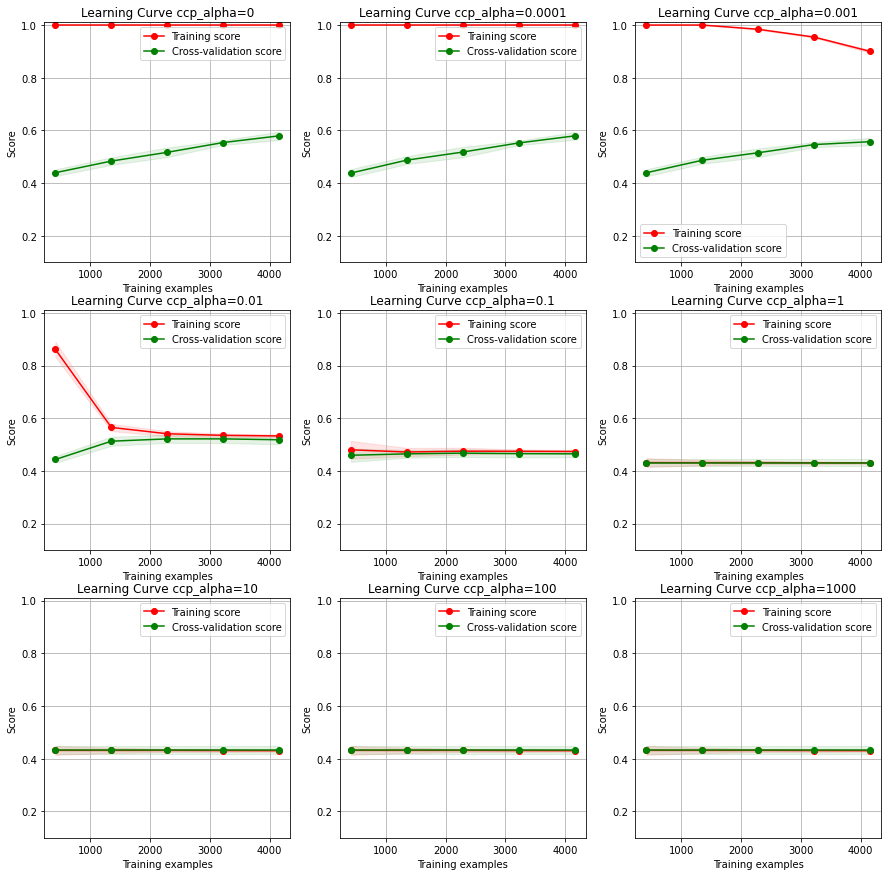

In [39]:
# Looking for the range of interesting ccp_alphas
grid_size = 3
_, axes = plt.subplots(grid_size, grid_size, figsize=(15, 15))
ccp_alpha_values = [0, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
ylim = (0.1, 1.01)
cv = ShuffleSplit(n_splits=20, test_size=0.2, random_state=0)
for i, ccp_alpha_value in enumerate(ccp_alpha_values):
    axe_to_plot = axes[int(i/len(axes)), (i%len(axes[0]))]
    title = f"Learning Curve ccp_alpha={ccp_alpha_value}"
    estimator = tree.DecisionTreeClassifier(criterion="entropy", ccp_alpha=ccp_alpha_value)
    plot_learning_curve(estimator, title, X_train, y_train, axes=axe_to_plot, ylim=ylim, cv=cv, n_jobs=4, scoring="accuracy")

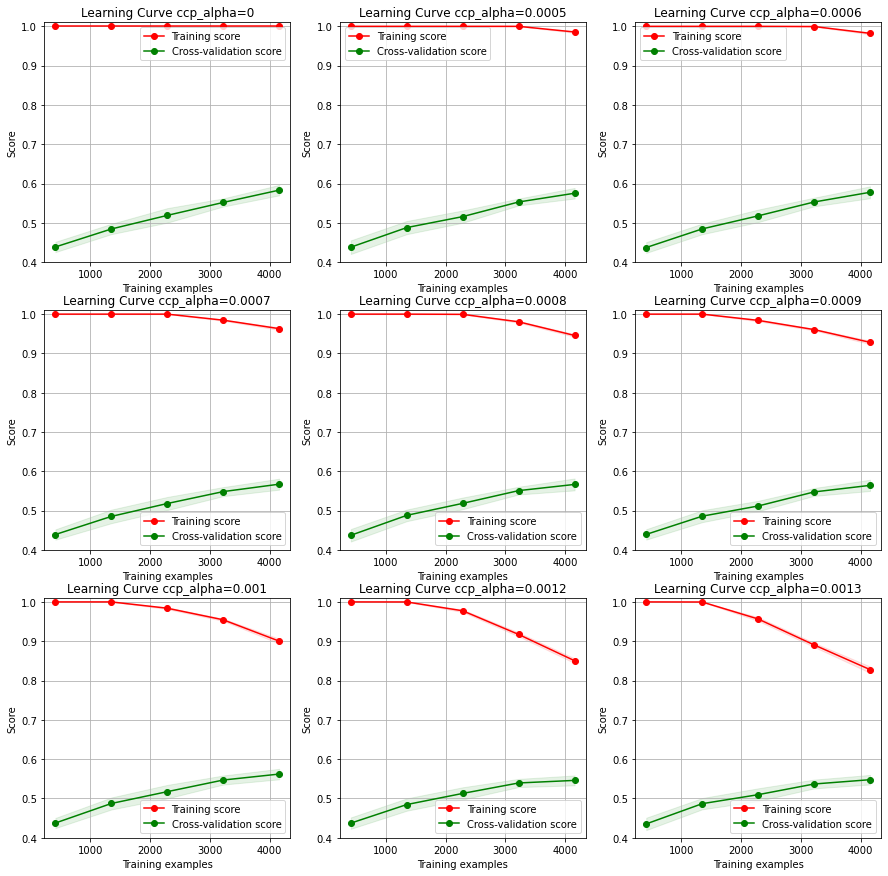

In [42]:
# Looking for the range of interesting ccp_alphas
grid_size = 3
_, axes = plt.subplots(grid_size, grid_size, figsize=(15, 15))
ccp_alpha_values = [0, 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008]
ccp_alpha_values = [0, 0.0005, 0.0006, 0.0007, 0.0008, 0.0009, 0.001, 0.0012, 0.0013]
ylim = (0.4, 1.01)
cv = ShuffleSplit(n_splits=20, test_size=0.2, random_state=0)
for i, ccp_alpha_value in enumerate(ccp_alpha_values):
    axe_to_plot = axes[int(i/len(axes)), (i%len(axes[0]))]
    title = f"Learning Curve ccp_alpha={ccp_alpha_value}"
    estimator = tree.DecisionTreeClassifier(criterion="entropy", ccp_alpha=ccp_alpha_value)
    plot_learning_curve(estimator, title, X_train, y_train, axes=axe_to_plot, ylim=ylim, cv=cv, n_jobs=4, scoring="accuracy")

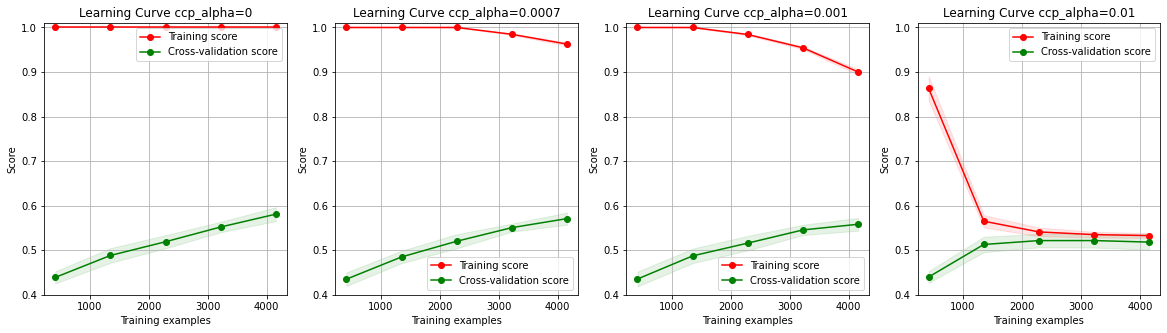

In [44]:
# Looking for the range of interesting ccp_alphas
_, axes = plt.subplots(1, 4, figsize=(20, 5))
ccp_alpha_values = [0, 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008]
ccp_alpha_values = [0, 0.0007, 0.001, 0.01]
ylim = (0.4, 1.01)
cv = ShuffleSplit(n_splits=20, test_size=0.2, random_state=0)
for i, ccp_alpha_value in enumerate(ccp_alpha_values):
    axe_to_plot = axes[i]
    title = f"Learning Curve ccp_alpha={ccp_alpha_value}"
    estimator = tree.DecisionTreeClassifier(criterion="entropy", ccp_alpha=ccp_alpha_value)
    plot_learning_curve(estimator, title, X_train, y_train, axes=axe_to_plot, ylim=ylim, cv=cv, n_jobs=4, scoring="accuracy")

### Playing with the depth

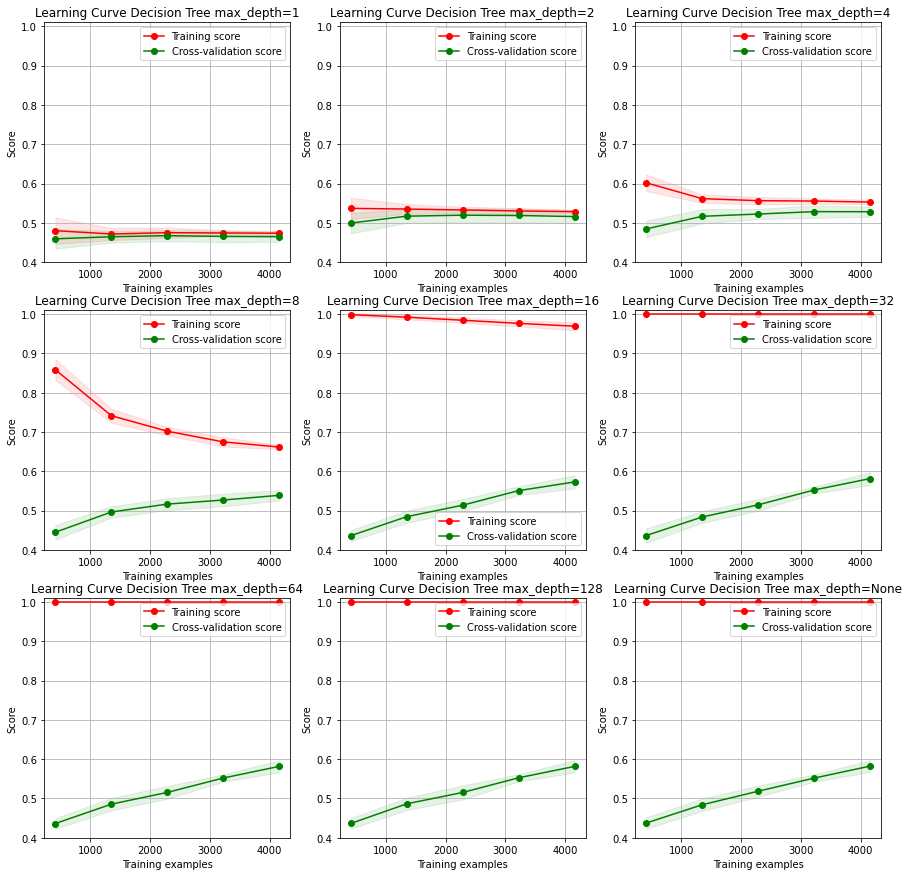

In [48]:
grid_size = 3
_, axes = plt.subplots(grid_size, grid_size, figsize=(15, 15))
depth_values = [1, 2, 4, 8, 16, 32, 64, 128, None]
ylim = (0.4, 1.01)
cv = ShuffleSplit(n_splits=20, test_size=0.2, random_state=0)
for i, depth_value in enumerate(depth_values):
    axe_to_plot = axes[int(i/len(axes)), (i%len(axes[0]))]
    title = f"Learning Curve Decision Tree max_depth={depth_value}"
    estimator = tree.DecisionTreeClassifier(criterion="entropy", max_depth=depth_value)
    plot_learning_curve(estimator, title, X_train, y_train, axes=axe_to_plot, ylim=ylim, cv=cv, n_jobs=4, scoring="accuracy")

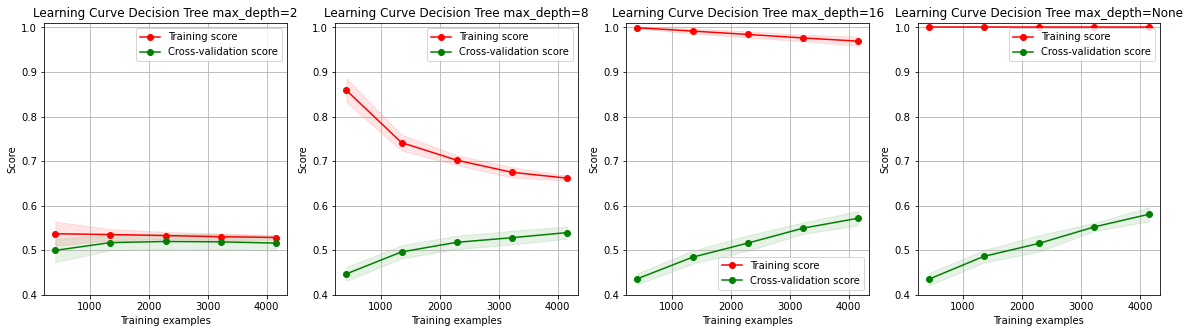

In [51]:
_, axes = plt.subplots(1, 4, figsize=(20, 5))
depth_values = [2, 8, 16, None]
ylim = (0.4, 1.01)
cv = ShuffleSplit(n_splits=20, test_size=0.2, random_state=0)
for i, depth_value in enumerate(depth_values):
    axe_to_plot = axes[i]
    title = f"Learning Curve Decision Tree max_depth={depth_value}"
    estimator = tree.DecisionTreeClassifier(criterion="entropy", max_depth=depth_value)
    plot_learning_curve(estimator, title, X_train, y_train, axes=axe_to_plot, ylim=ylim, cv=cv, n_jobs=4, scoring="accuracy")

<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

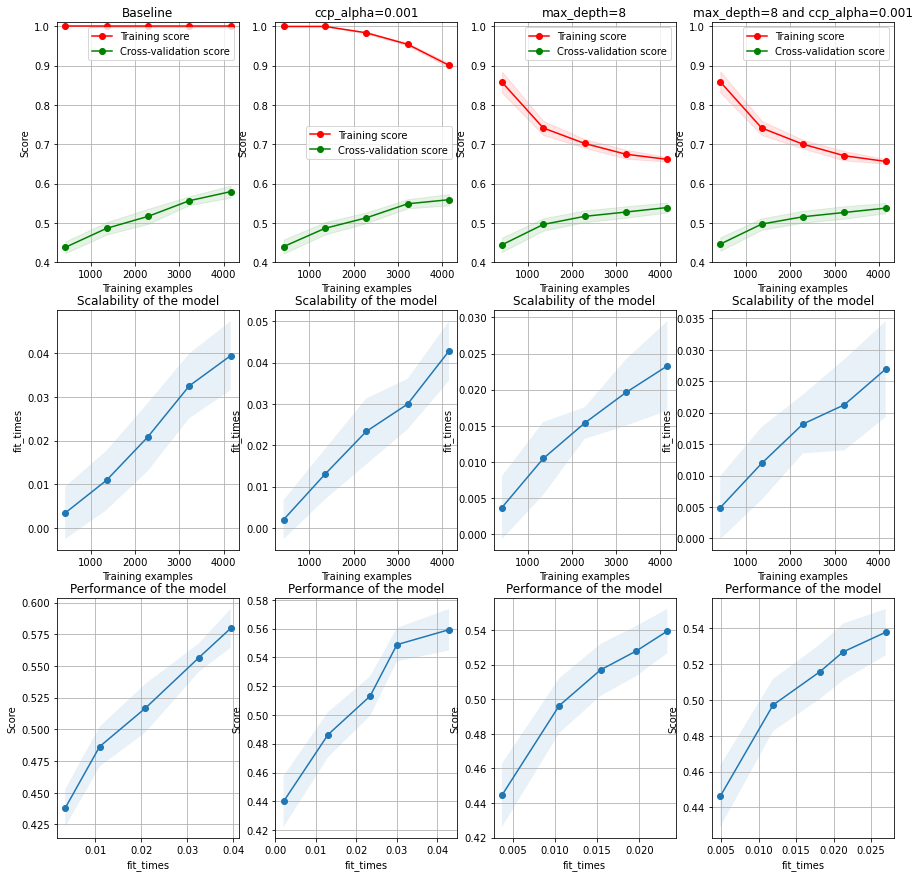

In [59]:
_, axes = plt.subplots(3, 4, figsize=(15, 15))
ylim = (0.4, 1.01)
cv = ShuffleSplit(n_splits=20, test_size=0.2, random_state=0)
# Baseline
title = f"Baseline"
estimator = tree.DecisionTreeClassifier(criterion="entropy")
plot_learning_curve(estimator, title, X_train, y_train, axes=axes[:, 0], ylim=ylim, cv=cv, n_jobs=4, scoring="accuracy", detailed=True)
# Best Prunning parameter
title = f"ccp_alpha=0.001"
estimator = tree.DecisionTreeClassifier(criterion="entropy", ccp_alpha=.001)
plot_learning_curve(estimator, title, X_train, y_train, axes=axes[:, 1], ylim=ylim, cv=cv, n_jobs=4, scoring="accuracy", detailed=True)
# Best depth parameter
title = f"max_depth=8"
estimator = tree.DecisionTreeClassifier(criterion="entropy", max_depth=8)
plot_learning_curve(estimator, title, X_train, y_train, axes=axes[:, 2], ylim=ylim, cv=cv, n_jobs=4, scoring="accuracy", detailed=True)
# Combining the two
title = f"max_depth=8 and ccp_alpha=0.001"
estimator = tree.DecisionTreeClassifier(criterion="entropy", max_depth=8, ccp_alpha=0.001)
plot_learning_curve(estimator, title, X_train, y_train, axes=axes[:, 3], ylim=ylim, cv=cv, n_jobs=4, scoring="accuracy", detailed=True)

In [60]:
# Final evaluation
estimator = tree.DecisionTreeClassifier(criterion="entropy")
get_estimator_final_score(estimator, X_train, y_train, X_test, y_test, "Baseline", "accuracy")
estimator = tree.DecisionTreeClassifier(criterion="entropy", ccp_alpha=0.001)
get_estimator_final_score(estimator, X_train, y_train, X_test, y_test, "ccp_alpha=0.001", "accuracy")
estimator = tree.DecisionTreeClassifier(criterion="entropy", max_depth=8)
get_estimator_final_score(estimator, X_train, y_train, X_test, y_test, "max_depth=8", "accuracy")
estimator = tree.DecisionTreeClassifier(criterion="entropy", max_depth=8, ccp_alpha=0.001)
get_estimator_final_score(estimator, X_train, y_train, X_test, y_test, "max_depth=4 and ccp_alpha=0.001", "accuracy")

Test accuracy score for Baseline: 0.6184615384615385
Test accuracy score for ccp_alpha=0.001: 0.56
Test accuracy score for max_depth=8: 0.54
Test accuracy score for max_depth=4 and ccp_alpha=0.001: 0.5361538461538462


0.5361538461538462